In [1]:
%load_ext autoreload
%autoreload 1

In [2]:
%aimport utils, Networks

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from utils import plot_images, load_embeddings_and_ids
from Networks import ContentBasedLearn2RankNetwork_Evaluation

In [4]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

###  Load pre-trained image embeddings

In [5]:
!ls "/mnt/workspace/Ugallery/Youtube-like/v16(10M-400K,avg+max,rsnt50+alxnt+incepv3,u(300,300,200)i(200,200),+p(rl&fk)-np,+npfavc(rl&fk)-nfavc,+nxt+hdaccklst-nfavc,fg.6,vcf.1/"

ids  item_vectors.npy


In [6]:
youtube_like = load_embeddings_and_ids(
('/mnt/workspace/Ugallery/Youtube-like/v16(10M-400K,avg+max,rsnt50+alxnt+incepv3,u(300,300,200)i(200,200),+p(rl&fk)-np,+npfavc(rl&fk)-nfavc,+nxt+hdaccklst-nfavc,fg.6,vcf.1/'),
'item_vectors.npy', 'ids')

In [7]:
youtube_like_embeddings = youtube_like['featmat']
artwork_ids = youtube_like['index2id']
artwork_id2index = youtube_like['id2index']

In [8]:
n_artworks = len(artwork_ids)
n_artworks

13297

In [9]:
youtube_like_embeddings.shape

(13297, 200)

### Testing Network

In [10]:
MODEL_PATH = ('/mnt/workspace/pamessina_models/ugallery/youtube_like/v16(10M-400K,avg+max,rsnt50+alxnt+incepv3,u(300,300,200)i(200,200),+p(rl&fk)-np,+npfavc(rl&fk)-nfavc,+nxt+hdaccklst-nfavc,fg.6,vcf.1/')

In [11]:
image_cache = dict()

In [12]:
all_indexes = list(range(n_artworks))

In [13]:
def get_recommendation(profile_indexes, topk=10):    
#     candidate_indexes = set(random.sample(all_indexes, 10000))
#     candidate_indexes.update(profile_indexes)
#     candidate_indexes = list(candidate_indexes)
    candidate_indexes = all_indexes
    with tf.Graph().as_default():      
        network = ContentBasedLearn2RankNetwork_Evaluation(
            user_layer_units=[300,300,200],
            latent_space_dim=200,
            profile_pooling_mode='AVG+MAX',
        )
        with tf.Session() as sess:
            saver = tf.train.Saver()            
            saver.restore(sess, tf.train.latest_checkpoint(MODEL_PATH))
            match_scores = network.get_match_scores(sess, youtube_like_embeddings, profile_indexes, candidate_indexes)
            tuples = [(s,i) for i,s in zip(candidate_indexes, match_scores)]
            tuples.sort(reverse=True)
            return [tuples[i][1] for i in range(topk)]

In [38]:
profile_indexes = random.sample(all_indexes, 2)
# profile_indexes = [artwork_id2index[45020]]
# profile_indexes = [artwork_id2index[46314]]
# profile_indexes = [artwork_id2index[53547]]
# profile_indexes = [artwork_id2index[56625]]
profile_ids = [artwork_ids[i] for i in profile_indexes]
rec = get_recommendation(profile_indexes, topk=20)
rec_ids = [artwork_ids[i] for i in rec]
print('profile_indexes = ', profile_indexes)
print('profile_ids = ', profile_ids)
print('recommendation: ', rec_ids)

INFO:tensorflow:Restoring parameters from /mnt/workspace/pamessina_models/ugallery/youtube_like/v16(10M-400K,avg+max,rsnt50+alxnt+incepv3,u(300,300,200)i(200,200),+p(rl&fk)-np,+npfavc(rl&fk)-nfavc,+nxt+hdaccklst-nfavc,fg.6,vcf.1/
profile_indexes =  [9951, 1690]
profile_ids =  [53582, 38124]
recommendation:  [24397, 25564, 56676, 38124, 53582, 56865, 56858, 11934, 56859, 14229, 48174, 57211, 43476, 28709, 33618, 45260, 28413, 53191, 32763, 44878]


-------------------------------


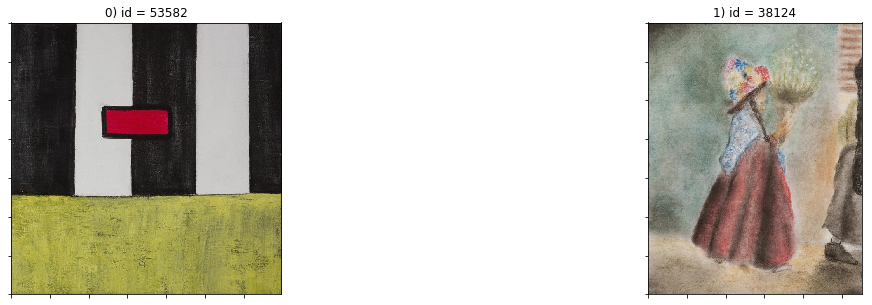

-------------------------------


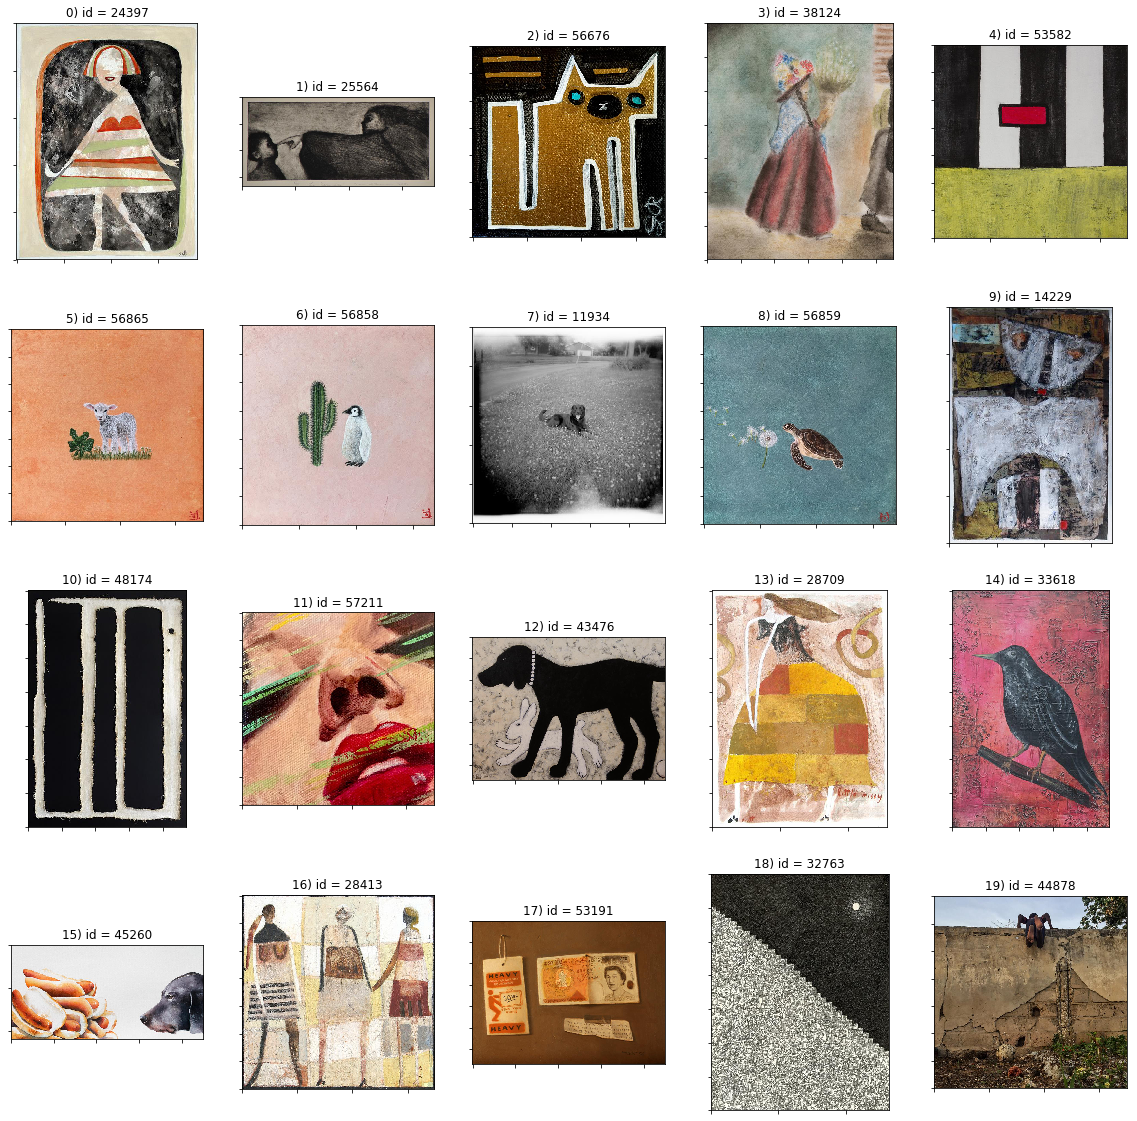

In [39]:
print('-------------------------------')
plot_images(plt, image_cache, profile_ids)
print('-------------------------------')
plot_images(plt, image_cache, rec_ids)